In [ ]:
# Generate expiry date

import numpy as np
import pandas as pd

In [ ]:
data = {
    'Product' : ['Milk', 'Software Trial', 'API Token', 'Medicine'],
    'Start Date' : pd.to_datetime(['2025-05-22', '2025-05-22', '2025-05-22', '2025-05-22']),
    'Expriry_Type' : ['7 Days', '30 Days', '1 Year', '2 Years'],
}
df = pd.DataFrame(data)

In [ ]:
df

,Product,Start Date,Expriry_Type
0,Milk,2025-05-22,7 Days
1,Software Trial,2025-05-22,30 Days
2,API Token,2025-05-22,1 Year
3,Medicine,2025-05-22,2 Years


In [ ]:
def calculate_expiry(row):
    start_date = row['Start Date']
    expiry_type = row['Expriry_Type']

    if expiry_type == '7 Days':
        return start_date + pd.Timedelta(days=7)
    elif expiry_type == '30 Days':
        return start_date + pd.Timedelta(days=30)
    elif expiry_type == '1 Year':
        return start_date + pd.DateOffset(years=1)
    elif expiry_type == '2 Years':
        return start_date + pd.DateOffset(years=2)
    else:
        return None

In [ ]:
df['Expiry Date'] = df.apply(calculate_expiry, axis=1)

In [ ]:
df

,Product,Start Date,Expriry_Type,Expiry Date
0,Milk,2025-05-22,7 Days,2025-05-29
1,Software Trial,2025-05-22,30 Days,2025-06-21
2,API Token,2025-05-22,1 Year,2026-05-22
3,Medicine,2025-05-22,2 Years,2027-05-22


In [ ]:
# How will you create a series from dict in Pandas?

data = {
    'index' : ['a', 'b', 'c'],
    'value' : [1, 2, 3]
}

df = pd.Series(data['value'], index=data['index'])
df

,0
a,1
b,2
c,3


In [ ]:
# How to get unique items of a specific column?

df = pd.read_csv('Bengaluru_House_Data.csv')

In [ ]:
df['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [ ]:
# How to handle missing data in python?

# 1. Drop rows with missing values
df.dropna()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [ ]:
# 2. Fill missing values with a specific value
df.fillna(0)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,0,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,0,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,0,3600,5.0,0.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
# 3. Fill missing values with the mean of the column

df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

numeric_mean = df[['total_sqft', 'price']].mean()
df.fillna(numeric_mean,)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600.0,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00


In [ ]:
# 4. Fill missing values with the median of the column
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')
numeric_median = df[['total_sqft', 'price']].median()

df.fillna(numeric_median, )

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600.0,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00


In [ ]:
# 5. Fill missing values with the mode of the column
df.fillna(df['area_type'].mode()[0])


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Super built-up Area,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Super built-up Area,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,Super built-up Area,3600.0,5.0,Super built-up Area,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00


In [ ]:

df.fillna(df['location'].mode()[0])

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Whitefield,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Whitefield,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,Whitefield,3600.0,5.0,Whitefield,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00


In [ ]:
# 6. Fill missing values with the previous value
df.fillna(method='ffill')

<ipython-input-173-b3e9222dac0d>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Theanmp,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,Soiewre,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,ArsiaEx,3600.0,5.0,0.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00


In [ ]:
# 7. Fill missing values with the next value
df.fillna(method='bfill')

<ipython-input-174-97291d1b668c>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill')


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,Soiewre,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,DuenaTa,1200.0,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,Mahla T,3600.0,5.0,1.0,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00


In [ ]:
# How can we convert DataFrame into an excel/csv file?

df.to_csv('output.csv', index=False)
df.to_excel('output.xlsx', index=False)

In [ ]:
# How to Reset the index?
df.reset_index(drop=True, inplace=True)

In [ ]:
# Difference between iloc/loc and iat/at in pandas?

df.loc[1:3, 'area_type']

,area_type
1,Plot Area
2,Built-up Area
3,Super built-up Area


In [ ]:
df.iloc[1:3, 0]

,area_type
1,Plot Area
2,Built-up Area


In [ ]:
# How to sort the columns?
df.sort_index(axis=1, ascending=False)

,total_sqft,society,size,price,location,bath,balcony,availability,area_type
0,1056.0,Coomee,2 BHK,39.07,Electronic City Phase II,2.0,1.0,19-Dec,Super built-up Area
1,2600.0,Theanmp,4 Bedroom,120.00,Chikka Tirupathi,5.0,3.0,Ready To Move,Plot Area
2,1440.0,NaN,3 BHK,62.00,Uttarahalli,2.0,3.0,Ready To Move,Built-up Area
3,1521.0,Soiewre,3 BHK,95.00,Lingadheeranahalli,3.0,1.0,Ready To Move,Super built-up Area
4,1200.0,NaN,2 BHK,51.00,Kothanur,2.0,1.0,Ready To Move,Super built-up Area
...,...,...,...,...,...,...,...,...,...
13315,3453.0,ArsiaEx,5 Bedroom,231.00,Whitefield,4.0,0.0,Ready To Move,Built-up Area
13316,3600.0,NaN,4 BHK,400.00,Richards Town,5.0,NaN,Ready To Move,Super built-up Area
13317,1141.0,Mahla T,2 BHK,60.00,Raja Rajeshwari Nagar,2.0,1.0,Ready To Move,Built-up Area
13318,4689.0,SollyCl,4 BHK,488.00,Padmanabhanagar,4.0,1.0,18-Jun,Super built-up Area


In [ ]:
# Vertical and horizontal concat of data frame

df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'C': [5, 6], 'D': [7, 8]})
df3 = pd.concat([df1, df2], axis=0)  # Vertical concat
df4 = pd.concat([df1, df2], axis=1)  # Horizontal concat

In [ ]:
df3

,A,B,C,D
0,1.0,3.0,NaN,NaN
1,2.0,4.0,NaN,NaN
0,NaN,NaN,5.0,7.0
1,NaN,NaN,6.0,8.0


In [ ]:
df4

,A,B,C,D
0,1,3,5,7
1,2,4,6,8


In [ ]:
# Filter dataframe using column value
df[df['area_type'] == 'Super built-up  Area']


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732.0,4.0,NaN,204.00
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345.0,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715.0,3.0,3.0,112.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600.0,5.0,NaN,400.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00


In [ ]:
df[df['area_type'].isin(['Super built-up  Area', 'Built-up  Area'])]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453.0,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600.0,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141.0,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00


In [ ]:

df[df['area_type'].str.contains('Super built-up  Area')]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170.0,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732.0,4.0,NaN,204.00
...,...,...,...,...,...,...,...,...,...
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345.0,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715.0,3.0,3.0,112.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600.0,5.0,NaN,400.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689.0,4.0,1.0,488.00


In [ ]:
%pip install yfinance

In [ ]:
# Red Candle with 50% Stoploss (Candles of Previous 2 days should be red candle. ) and
# perform Buy/Sell/Hold operation on it.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
stock_data = yf.download('AAPL', start = '2024-01-01', end = '2025-05-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
stock_data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-02,184.290405,187.070052,182.553128,185.789422,82488700
2024-01-03,182.910522,184.528677,182.096477,182.880742,58414500
2024-01-04,180.587540,181.758954,179.565029,180.825785,71983600
2024-01-05,179.862839,181.431354,178.860187,180.666963,62303300
2024-01-08,184.210999,184.250716,180.180517,180.766224,59144500
...,...,...,...,...,...
2025-04-24,208.097107,208.556511,202.674226,204.621669,47311000
2025-04-25,209.005920,209.475306,205.929952,206.099728,38222300


In [ ]:
stock_data['Red_candle'] = np.where(stock_data['Close'] < stock_data['Open'], 1, 0)


In [ ]:
stock_data

Price,Close,High,Low,Open,Volume,Red_candle
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,
2024-01-02,184.290405,187.070052,182.553128,185.789422,82488700,1
2024-01-03,182.910522,184.528677,182.096477,182.880742,58414500,0
2024-01-04,180.587540,181.758954,179.565029,180.825785,71983600,1
2024-01-05,179.862839,181.431354,178.860187,180.666963,62303300,1
2024-01-08,184.210999,184.250716,180.180517,180.766224,59144500,0
...,...,...,...,...,...,...
2025-04-24,208.097107,208.556511,202.674226,204.621669,47311000,0
2025-04-25,209.005920,209.475306,205.929952,206.099728,38222300,0


In [ ]:
stock_data['Prev_1_Red_candle'] = stock_data['Red_candle'].shift(1)
stock_data['Prev_2_Red_candle'] = stock_data['Red_candle'].shift(2)

In [ ]:
stock_data['Buy_Signal'] = np.where((stock_data['Red_candle'] == 1) & (stock_data['Prev_1_Red_candle'] == 1) & (stock_data['Prev_2_Red_candle'] == 1), 1, 0)

In [ ]:
stock_data['Position'] = 0
stock_data['Stop_Loss'] = np.nan

In [ ]:
# Modified strategy that allows multiple positions using position sizing
# Reset variables
max_position_size = 1.0  # 100% of capital
current_position_size = 0.0
positions = []  # Will track multiple positions

# Clear previous values
stock_data['Position_Size'] = 0.0
stock_data['Stop_Loss'] = np.nan
stock_data['Active_Positions'] = 0  # Number of active positions

for i in range(len(stock_data)):
    current_date = stock_data.index[i]

    # Get scalar values to avoid Series comparison issues
    current_price = float(stock_data['Close'].iloc[i])
    current_low = float(stock_data['Low'].iloc[i])
    current_buy_signal = int(stock_data['Buy_Signal'].iloc[i])

    # Check for stop loss hits on existing positions
    active_positions = []
    for pos in positions:
        entry_date, entry_price, size, stop_loss = pos

        # Now using scalar values for comparison
        if current_low <= stop_loss:
            # Position closed - don't add to active positions
            print(f"Position closed: {entry_date.strftime('%Y-%m-%d')} @ {stop_loss:.2f}")
        else:
            # Position still active
            active_positions.append(pos)

    # Update positions list with active ones only
    positions = active_positions

    # Update available position size
    current_position_size = sum(size for _, _, size, _ in positions)
    available_position = max_position_size - current_position_size

    # Entry logic - when we have a buy signal and available position size
    position_increment = 0.25  # 25% per trade
    if current_buy_signal == 1 and available_position >= position_increment:
        # Calculate new position
        new_size = min(position_increment, available_position)
        new_entry = current_price
        new_stop = new_entry * 0.5  # 50% stop loss

        # Add new position
        positions.append((current_date, new_entry, new_size, new_stop))

    # Update dataframe with current state
    stock_data.loc[current_date, 'Position_Size'] = sum(size for _, _, size, _ in positions)
    stock_data.loc[current_date, 'Active_Positions'] = len(positions)

    # Store lowest stop loss for visualization (could store all of them in a more complex approach)
    if positions:
        stock_data.loc[current_date, 'Stop_Loss'] = min(stop for _, _, _, stop in positions)

# Generate signals
stock_data['Signal'] = 'Hold'
stock_data.loc[(stock_data['Position_Size'] > stock_data['Position_Size'].shift(1)), 'Signal'] = 'Buy'
stock_data.loc[(stock_data['Position_Size'] < stock_data['Position_Size'].shift(1)), 'Signal'] = 'Sell'

# Count signals
buy_count = len(stock_data[stock_data['Signal'] == 'Buy'])
sell_count = len(stock_data[stock_data['Signal'] == 'Sell'])
print(f"\nNumber of Buy signals: {buy_count}")
print(f"\nNumber of Sell signals: {sell_count}")

# Display active positions at the end
print(f"\nFinal active positions: {len(positions)}")
for entry_date, entry_price, size, stop_loss in positions:
    # Get a scalar value for current_price
    current_price = float(stock_data['Close'].iloc[-1])
    profit_pct = ((current_price / entry_price) - 1) * 100
    print(f"  {entry_date.strftime('%Y-%m-%d')} @ ${entry_price:.2f}, SL: ${stop_loss:.2f}, P/L: {profit_pct:.2f}%, Size: {size*100:.1f}%")

<ipython-input-195-ddbfca84510f>:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(stock_data['Close'].iloc[i])
<ipython-input-195-ddbfca84510f>:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_low = float(stock_data['Low'].iloc[i])
<ipython-input-195-ddbfca84510f>:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(stock_data['Close'].iloc[i])
<ipython-input-195-ddbfca84510f>:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_low = float(stock_data['Low'].iloc[i])
<ipython-input-195-ddbfca84510f>:16: FutureWarning: Calling float on a singl


Number of Buy signals: 4

Number of Sell signals: 0

Final active positions: 4
  2024-01-26 @ $191.02, SL: $95.51, P/L: 11.10%, Size: 25.0%
  2024-01-29 @ $190.34, SL: $95.17, P/L: 11.50%, Size: 25.0%
  2024-01-30 @ $186.67, SL: $93.34, P/L: 13.69%, Size: 25.0%
  2024-01-31 @ $183.06, SL: $91.53, P/L: 15.93%, Size: 25.0%


<ipython-input-195-ddbfca84510f>:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(stock_data['Close'].iloc[i])
<ipython-input-195-ddbfca84510f>:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_low = float(stock_data['Low'].iloc[i])
<ipython-input-195-ddbfca84510f>:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(stock_data['Close'].iloc[i])
<ipython-input-195-ddbfca84510f>:17: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_low = float(stock_data['Low'].iloc[i])
<ipython-input-195-ddbfca84510f>:16: FutureWarning: Calling float on a singl

In [ ]:
stock_data['Signal'] = 'Hold'
stock_data.loc[(stock_data['Buy_Signal']) & (stock_data['Position'].shift(1) == 0), 'Signal'] = 'Buy'
stock_data.loc[(stock_data['Position'] == 0) & (stock_data['Position'].shift(1) == 1) , 'Signal'] = 'Sell'

In [ ]:
stock_data[['Open', 'Low', 'Close', 'Red_candle', 'Prev_1_Red_candle', 'Prev_2_Red_candle', 'Buy_Signal', 'Position', 'Stop_Loss', 'Signal']]

Price,Open,Low,Close,Red_candle,Prev_1_Red_candle,Prev_2_Red_candle,Buy_Signal,Position,Stop_Loss,Signal
Ticker,AAPL,AAPL,AAPL,,,,,,,
Date,,,,,,,,,,
2024-01-02,185.789422,182.553128,184.290405,1,NaN,NaN,0,0,NaN,Hold
2024-01-03,182.880742,182.096477,182.910522,0,1.0,NaN,0,0,NaN,Hold
2024-01-04,180.825785,179.565029,180.587540,1,0.0,1.0,0,0,NaN,Hold
2024-01-05,180.666963,178.860187,179.862839,1,1.0,0.0,0,0,NaN,Hold
2024-01-08,180.766224,180.180517,184.210999,0,1.0,1.0,0,0,NaN,Hold
...,...,...,...,...,...,...,...,...,...,...
2025-04-24,204.621669,202.674226,208.097107,0,1.0,0.0,0,0,91.529701,Hold
2025-04-25,206.099728,205.929952,209.005920,0,0.0,1.0,0,0,91.529701,Hold


In [ ]:
stock_data['Signal'].nunique()

2

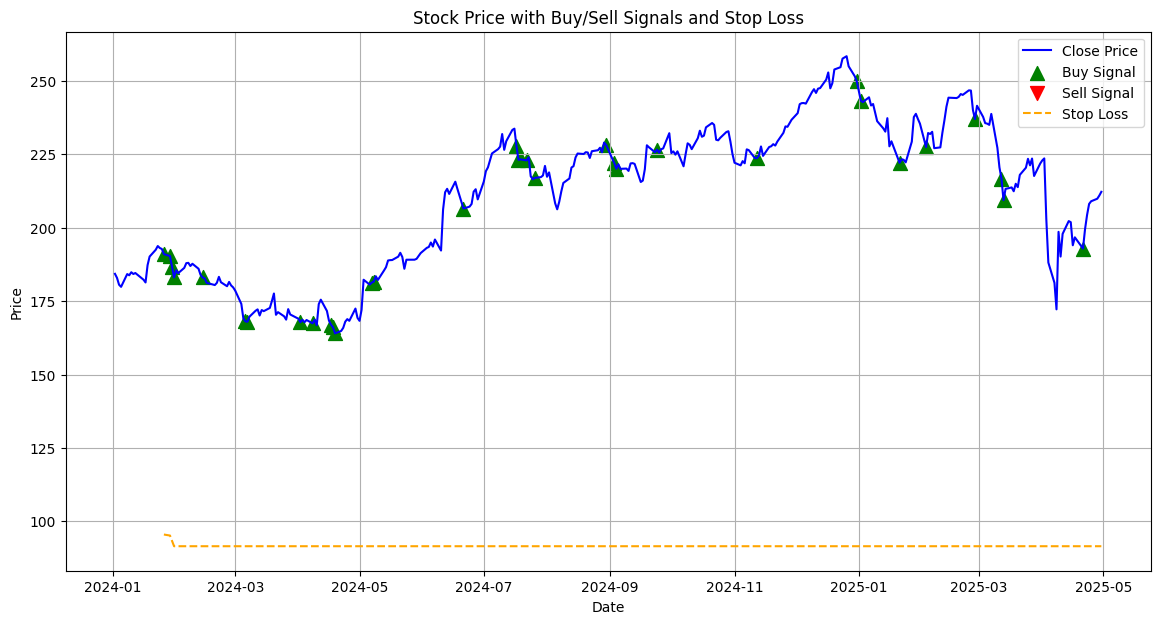

In [ ]:
plt.figure(figsize=(14, 7))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')

buy_signals = stock_data[stock_data['Signal'] == 'Buy']
plt.scatter(buy_signals.index, buy_signals['Close'], label='Buy Signal', marker='^', color='green', s=100)

sell_signals = stock_data[stock_data['Signal'] == 'Sell']
plt.scatter(sell_signals.index, sell_signals['Close'], label='Sell Signal', marker='v', color='red', s=100)

plt.plot(stock_data.index, stock_data['Stop_Loss'], label='Stop Loss', color='orange', linestyle='--')

plt.title('Stock Price with Buy/Sell Signals and Stop Loss')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import polars as pl
import datetime as dt

In [ ]:
df = pl.DataFrame({
    "name" : ["Alice", "Bob", "Charlie"],
    "Birthdate" : [dt.date(1990, 1, 1), dt.date(1985, 5, 15), dt.date(2000, 12, 31)],
    "Age" : [33, 38, 23],
    "weight" : [55.5, 70.0, 60.0],
    "height" : [1.65, 1.80, 1.75]
})

In [ ]:
df

name,Birthdate,Age,weight,height
str,date,i64,f64,f64
"""Alice""",1990-01-01,33,55.5,1.65
"""Bob""",1985-05-15,38,70.0,1.8
"""Charlie""",2000-12-31,23,60.0,1.75


In [ ]:
df.write_csv('output.csv')

In [ ]:
df_csv = pl.read_csv('output.csv')

In [ ]:
df_csv

name,Birthdate,Age,weight,height
str,str,i64,f64,f64
"""Alice""","""1990-01-01""",33,55.5,1.65
"""Bob""","""1985-05-15""",38,70.0,1.8
"""Charlie""","""2000-12-31""",23,60.0,1.75


In [ ]:
pl.col('weight')/pl.col('height')**2

<Expr ['[(col("weight")) / (col("heigh…'] at 0x78846A328AD0>

In [ ]:
result = df.select(
    pl.col('name'),
    pl.col('Birthdate').dt.year().alias('Birth Year'),
    (pl.col('weight')/pl.col('height')**2).alias('BMI'),

)

In [ ]:
result

name,Birth Year,BMI
str,i32,f64
"""Alice""",1990,20.385675
"""Bob""",1985,21.604938
"""Charlie""",2000,19.591837


In [ ]:
result = df.select(
    pl.col("name"),
    (pl.col("weight", "height") * 0.95).round(2).name.suffix("-5%"),
)

In [ ]:
result

name,weight-5%,height-5%
str,f64,f64
"""Alice""",52.72,1.57
"""Bob""",66.5,1.71
"""Charlie""",57.0,1.66


In [ ]:
result = df.with_columns(
    birth_year = pl.col("Birthdate").dt.year(),
    bmi = (pl.col("weight") / pl.col("height")**2).alias("BMI"),
)

In [ ]:
print(result)

shape: (3, 7)
┌─────────┬────────────┬─────┬────────┬────────┬────────────┬───────────┐
│ name    ┆ Birthdate  ┆ Age ┆ weight ┆ height ┆ birth_year ┆ bmi       │
│ ---     ┆ ---        ┆ --- ┆ ---    ┆ ---    ┆ ---        ┆ ---       │
│ str     ┆ date       ┆ i64 ┆ f64    ┆ f64    ┆ i32        ┆ f64       │
╞═════════╪════════════╪═════╪════════╪════════╪════════════╪═══════════╡
│ Alice   ┆ 1990-01-01 ┆ 33  ┆ 55.5   ┆ 1.65   ┆ 1990       ┆ 20.385675 │
│ Bob     ┆ 1985-05-15 ┆ 38  ┆ 70.0   ┆ 1.8    ┆ 1985       ┆ 21.604938 │
│ Charlie ┆ 2000-12-31 ┆ 23  ┆ 60.0   ┆ 1.75   ┆ 2000       ┆ 19.591837 │
└─────────┴────────────┴─────┴────────┴────────┴────────────┴───────────┘


In [ ]:
result = df.filter(
    pl.col("weight") > 60,
)

In [ ]:
print(result)

shape: (1, 5)
┌──────┬────────────┬─────┬────────┬────────┐
│ name ┆ Birthdate  ┆ Age ┆ weight ┆ height │
│ ---  ┆ ---        ┆ --- ┆ ---    ┆ ---    │
│ str  ┆ date       ┆ i64 ┆ f64    ┆ f64    │
╞══════╪════════════╪═════╪════════╪════════╡
│ Bob  ┆ 1985-05-15 ┆ 38  ┆ 70.0   ┆ 1.8    │
└──────┴────────────┴─────┴────────┴────────┘


In [ ]:
result = df.filter(
    pl.col("Birthdate").is_between(dt.date(1998, 12, 31),dt.date(2000, 1, 1)),
    pl.col("height") > 1.7,
)

In [ ]:
result

name,Birthdate,Age,weight,height
str,date,i64,f64,f64


In [ ]:
result = df.group_by(
    (pl.col("Birthdate").dt.year()//10 * 10).alias("Birth Year Decade"),
    maintain_order=True
).len()

print(result)


shape: (3, 2)
┌───────────────────┬─────┐
│ Birth Year Decade ┆ len │
│ ---               ┆ --- │
│ i32               ┆ u32 │
╞═══════════════════╪═════╡
│ 1990              ┆ 1   │
│ 1980              ┆ 1   │
│ 2000              ┆ 1   │
└───────────────────┴─────┘


In [ ]:
result = df.group_by(
    (pl.col("Birthdate").dt.year()//10*10).alias("Birth Year Decade"),
    maintain_order=True
).agg(
    pl.len().alias("sample_size"),
    pl.col("weight").mean().round(2).alias("Average_weight"),
    pl.col("height").max().alias("Max_height"),
)

print(result)

shape: (3, 4)
┌───────────────────┬─────────────┬────────────────┬────────────┐
│ Birth Year Decade ┆ sample_size ┆ Average_weight ┆ Max_height │
│ ---               ┆ ---         ┆ ---            ┆ ---        │
│ i32               ┆ u32         ┆ f64            ┆ f64        │
╞═══════════════════╪═════════════╪════════════════╪════════════╡
│ 1990              ┆ 1           ┆ 55.5           ┆ 1.65       │
│ 1980              ┆ 1           ┆ 70.0           ┆ 1.8        │
│ 2000              ┆ 1           ┆ 60.0           ┆ 1.75       │
└───────────────────┴─────────────┴────────────────┴────────────┘


In [ ]:
result = df.with_columns(
    (pl.col("Birthdate").dt.year()//10*10).alias("Birth Year Decade"),
    pl.col("name").str.split(by = " ").list.first(),
).select(
    pl.all().exclude("Birtdate"),
).group_by(
    pl.col("Birth Year Decade"),
    maintain_order=True
).agg(
        pl.col("name"),
        pl.col("weight", "height").mean().round(2).name.prefix("avg_"),
    )

print(result)

shape: (3, 4)
┌───────────────────┬─────────────┬────────────┬────────────┐
│ Birth Year Decade ┆ name        ┆ avg_weight ┆ avg_height │
│ ---               ┆ ---         ┆ ---        ┆ ---        │
│ i32               ┆ list[str]   ┆ f64        ┆ f64        │
╞═══════════════════╪═════════════╪════════════╪════════════╡
│ 1990              ┆ ["Alice"]   ┆ 55.5       ┆ 1.65       │
│ 1980              ┆ ["Bob"]     ┆ 70.0       ┆ 1.8        │
│ 2000              ┆ ["Charlie"] ┆ 60.0       ┆ 1.75       │
└───────────────────┴─────────────┴────────────┴────────────┘


In [ ]:
# combining two dataframes

df2 = pl.DataFrame({
    "name" : ["Alice", "Bob", "Charlie"],
    "Birthdate" : [dt.date(1990, 1, 1), dt.date(1985, 5, 15), dt.date(2000, 12, 31)],
    "Age" : [33, 38, 23],
    "weight" : [55.5, 70.0, 60.0],
    "height" : [1.65, 1.80, 1.75]
})

print(df.join(df2, on = "name", how  = "inner"))

shape: (3, 9)
┌─────────┬────────────┬─────┬────────┬───┬──────────────┬───────────┬──────────────┬──────────────┐
│ name    ┆ Birthdate  ┆ Age ┆ weight ┆ … ┆ Birthdate_ri ┆ Age_right ┆ weight_right ┆ height_right │
│ ---     ┆ ---        ┆ --- ┆ ---    ┆   ┆ ght          ┆ ---       ┆ ---          ┆ ---          │
│ str     ┆ date       ┆ i64 ┆ f64    ┆   ┆ ---          ┆ i64       ┆ f64          ┆ f64          │
│         ┆            ┆     ┆        ┆   ┆ date         ┆           ┆              ┆              │
╞═════════╪════════════╪═════╪════════╪═══╪══════════════╪═══════════╪══════════════╪══════════════╡
│ Alice   ┆ 1990-01-01 ┆ 33  ┆ 55.5   ┆ … ┆ 1990-01-01   ┆ 33        ┆ 55.5         ┆ 1.65         │
│ Bob     ┆ 1985-05-15 ┆ 38  ┆ 70.0   ┆ … ┆ 1985-05-15   ┆ 38        ┆ 70.0         ┆ 1.8          │
│ Charlie ┆ 2000-12-31 ┆ 23  ┆ 60.0   ┆ … ┆ 2000-12-31   ┆ 23        ┆ 60.0         ┆ 1.75         │
└─────────┴────────────┴─────┴────────┴───┴──────────────┴───────────┴───────

In [ ]:
# concatenating two dataframes

df3 = pl.DataFrame({
    'name' : ['Ethen', 'Frank', 'George'],
    'Birthdate' : [dt.date(1990, 1, 1), dt.date(1985, 5, 15), dt.date(2000, 12, 31)],
    'Age' : [33, 38, 23],
    'weight' : [55.5, 70.0, 60.0],
    'height' : [1.65, 1.80, 1.75]
})

print(pl.concat([df, df3], how = "vertical"))

shape: (6, 5)
┌─────────┬────────────┬─────┬────────┬────────┐
│ name    ┆ Birthdate  ┆ Age ┆ weight ┆ height │
│ ---     ┆ ---        ┆ --- ┆ ---    ┆ ---    │
│ str     ┆ date       ┆ i64 ┆ f64    ┆ f64    │
╞═════════╪════════════╪═════╪════════╪════════╡
│ Alice   ┆ 1990-01-01 ┆ 33  ┆ 55.5   ┆ 1.65   │
│ Bob     ┆ 1985-05-15 ┆ 38  ┆ 70.0   ┆ 1.8    │
│ Charlie ┆ 2000-12-31 ┆ 23  ┆ 60.0   ┆ 1.75   │
│ Ethen   ┆ 1990-01-01 ┆ 33  ┆ 55.5   ┆ 1.65   │
│ Frank   ┆ 1985-05-15 ┆ 38  ┆ 70.0   ┆ 1.8    │
│ George  ┆ 2000-12-31 ┆ 23  ┆ 60.0   ┆ 1.75   │
└─────────┴────────────┴─────┴────────┴────────┘


# Series

In [ ]:
import polars as pl

s = pl.Series("ints", [1, 2, 3, 4, 5])
print(s)

shape: (5,)
Series: 'ints' [i64]
[
	1
	2
	3
	4
	5
]


In [ ]:
s1 = pl.Series("ints", [1, 2, 3, 4, 5])
s2 = pl.Series("uints", [1, 2, 3, 4, 5], dtype=pl.UInt64)
print(s1.dtype, s2.dtype)

Int64 UInt64


# DataFrame

In [ ]:
from datetime import date

df = pl.DataFrame({
    "name" : ["Alice", "Bob", "Charlie"],
    "Birthdate" : [
        date(1990, 1, 1),
        date(1985, 5, 15),
        date(2000, 12, 31)
    ],
    "Weight" : [55.5, 70.0, 60.0],
    "Height" : [1.65, 1.80, 1.75]
})

print(df)

shape: (3, 4)
┌─────────┬────────────┬────────┬────────┐
│ name    ┆ Birthdate  ┆ Weight ┆ Height │
│ ---     ┆ ---        ┆ ---    ┆ ---    │
│ str     ┆ date       ┆ f64    ┆ f64    │
╞═════════╪════════════╪════════╪════════╡
│ Alice   ┆ 1990-01-01 ┆ 55.5   ┆ 1.65   │
│ Bob     ┆ 1985-05-15 ┆ 70.0   ┆ 1.8    │
│ Charlie ┆ 2000-12-31 ┆ 60.0   ┆ 1.75   │
└─────────┴────────────┴────────┴────────┘


In [ ]:
print(df.head())

shape: (3, 4)
┌─────────┬────────────┬────────┬────────┐
│ name    ┆ Birthdate  ┆ Weight ┆ Height │
│ ---     ┆ ---        ┆ ---    ┆ ---    │
│ str     ┆ date       ┆ f64    ┆ f64    │
╞═════════╪════════════╪════════╪════════╡
│ Alice   ┆ 1990-01-01 ┆ 55.5   ┆ 1.65   │
│ Bob     ┆ 1985-05-15 ┆ 70.0   ┆ 1.8    │
│ Charlie ┆ 2000-12-31 ┆ 60.0   ┆ 1.75   │
└─────────┴────────────┴────────┴────────┘


In [ ]:
print(df.glimpse(return_as_string = True))

Rows: 3
Columns: 4
$ name       <str> 'Alice', 'Bob', 'Charlie'
$ Birthdate <date> 1990-01-01, 1985-05-15, 2000-12-31
$ Weight     <f64> 55.5, 70.0, 60.0
$ Height     <f64> 1.65, 1.8, 1.75



In [ ]:
print(df.tail())

shape: (3, 4)
┌─────────┬────────────┬────────┬────────┐
│ name    ┆ Birthdate  ┆ Weight ┆ Height │
│ ---     ┆ ---        ┆ ---    ┆ ---    │
│ str     ┆ date       ┆ f64    ┆ f64    │
╞═════════╪════════════╪════════╪════════╡
│ Alice   ┆ 1990-01-01 ┆ 55.5   ┆ 1.65   │
│ Bob     ┆ 1985-05-15 ┆ 70.0   ┆ 1.8    │
│ Charlie ┆ 2000-12-31 ┆ 60.0   ┆ 1.75   │
└─────────┴────────────┴────────┴────────┘


In [ ]:
import random
random.seed(42)

print(df.sample())

shape: (1, 4)
┌─────────┬────────────┬────────┬────────┐
│ name    ┆ Birthdate  ┆ Weight ┆ Height │
│ ---     ┆ ---        ┆ ---    ┆ ---    │
│ str     ┆ date       ┆ f64    ┆ f64    │
╞═════════╪════════════╪════════╪════════╡
│ Charlie ┆ 2000-12-31 ┆ 60.0   ┆ 1.75   │
└─────────┴────────────┴────────┴────────┘


In [ ]:
print(df.describe())

shape: (9, 5)
┌────────────┬─────────┬─────────────────────┬───────────┬──────────┐
│ statistic  ┆ name    ┆ Birthdate           ┆ Weight    ┆ Height   │
│ ---        ┆ ---     ┆ ---                 ┆ ---       ┆ ---      │
│ str        ┆ str     ┆ str                 ┆ f64       ┆ f64      │
╞════════════╪═════════╪═════════════════════╪═══════════╪══════════╡
│ count      ┆ 3       ┆ 3                   ┆ 3.0       ┆ 3.0      │
│ null_count ┆ 0       ┆ 0                   ┆ 0.0       ┆ 0.0      │
│ mean       ┆ null    ┆ 1992-02-15 00:00:00 ┆ 61.833333 ┆ 1.733333 │
│ std        ┆ null    ┆ null                ┆ 7.421815  ┆ 0.076376 │
│ min        ┆ Alice   ┆ 1985-05-15          ┆ 55.5      ┆ 1.65     │
│ 25%        ┆ null    ┆ 1990-01-01          ┆ 60.0      ┆ 1.75     │
│ 50%        ┆ null    ┆ 1990-01-01          ┆ 60.0      ┆ 1.75     │
│ 75%        ┆ null    ┆ 2000-12-31          ┆ 70.0      ┆ 1.8      │
│ max        ┆ Charlie ┆ 2000-12-31          ┆ 70.0      ┆ 1.8      │
└─────

In [ ]:
print(df.schema)

Schema([('name', String), ('Birthdate', Date), ('Weight', Float64), ('Height', Float64)])


In [ ]:
df = pl.DataFrame({
    "name" : ["Alice", "Bob", "Charlie", "Daniel"],
    "age" : [27, 39, 41, 43],
},
schema={"name" : None, "age" : pl.UInt8}
)
print(df)

shape: (4, 2)
┌─────────┬─────┐
│ name    ┆ age │
│ ---     ┆ --- │
│ str     ┆ u8  │
╞═════════╪═════╡
│ Alice   ┆ 27  │
│ Bob     ┆ 39  │
│ Charlie ┆ 41  │
│ Daniel  ┆ 43  │
└─────────┴─────┘


In [ ]:
df = pl.DataFrame({
    "name" : ["Alice", "Bob", "Charlie", "Daniel"],
    "age" : [27, 39, 41, 43],
}, schema_overrides={"age" : pl.UInt64})
print(df)



shape: (4, 2)
┌─────────┬─────┐
│ name    ┆ age │
│ ---     ┆ --- │
│ str     ┆ u64 │
╞═════════╪═════╡
│ Alice   ┆ 27  │
│ Bob     ┆ 39  │
│ Charlie ┆ 41  │
│ Daniel  ┆ 43  │
└─────────┴─────┘


In [ ]:
from datetime import date

df = pl.DataFrame({
    "name" : ["Alice", "Bob", "Charlie"],
    "Birthdate" : [
        date(1990, 1, 1),
        date(1985, 5, 15),
        date(2000, 12, 31)
    ],
    "Weight" : [55.5, 70.0, 60.0],
    "Height" : [1.65, 1.80, 1.75]
})

print(df)

shape: (3, 4)
┌─────────┬────────────┬────────┬────────┐
│ name    ┆ Birthdate  ┆ Weight ┆ Height │
│ ---     ┆ ---        ┆ ---    ┆ ---    │
│ str     ┆ date       ┆ f64    ┆ f64    │
╞═════════╪════════════╪════════╪════════╡
│ Alice   ┆ 1990-01-01 ┆ 55.5   ┆ 1.65   │
│ Bob     ┆ 1985-05-15 ┆ 70.0   ┆ 1.8    │
│ Charlie ┆ 2000-12-31 ┆ 60.0   ┆ 1.75   │
└─────────┴────────────┴────────┴────────┘


In [ ]:
bmi_expr = pl.col("Weight")/(pl.col("Height")**2)
bmi_expr

<Expr ['[(col("Weight")) / (col("Heigh…'] at 0x78844CBBE190>

In [ ]:
result = df.select(bmi = bmi_expr, avg_bmi = bmi_expr.mean(), ideal_max_bmi = 25)
print(result)


shape: (3, 3)
┌───────────┬───────────┬───────────────┐
│ bmi       ┆ avg_bmi   ┆ ideal_max_bmi │
│ ---       ┆ ---       ┆ ---           │
│ f64       ┆ f64       ┆ i32           │
╞═══════════╪═══════════╪═══════════════╡
│ 20.385675 ┆ 20.527483 ┆ 25            │
│ 21.604938 ┆ 20.527483 ┆ 25            │
│ 19.591837 ┆ 20.527483 ┆ 25            │
└───────────┴───────────┴───────────────┘


In [ ]:
result = df.select(
    division = (bmi_expr - bmi_expr.mean())/bmi_expr.std()
)
print(result)

shape: (3, 1)
┌───────────┐
│ division  │
│ ---       │
│ f64       │
╞═══════════╡
│ -0.139848 │
│ 1.062563  │
│ -0.922715 │
└───────────┘


In [ ]:
result = df.with_columns(bmi = bmi_expr, avg_bmi = bmi_expr.mean(), ideal_max_bmi = 25)
print(result)

shape: (3, 7)
┌─────────┬────────────┬────────┬────────┬───────────┬───────────┬───────────────┐
│ name    ┆ Birthdate  ┆ Weight ┆ Height ┆ bmi       ┆ avg_bmi   ┆ ideal_max_bmi │
│ ---     ┆ ---        ┆ ---    ┆ ---    ┆ ---       ┆ ---       ┆ ---           │
│ str     ┆ date       ┆ f64    ┆ f64    ┆ f64       ┆ f64       ┆ i32           │
╞═════════╪════════════╪════════╪════════╪═══════════╪═══════════╪═══════════════╡
│ Alice   ┆ 1990-01-01 ┆ 55.5   ┆ 1.65   ┆ 20.385675 ┆ 20.527483 ┆ 25            │
│ Bob     ┆ 1985-05-15 ┆ 70.0   ┆ 1.8    ┆ 21.604938 ┆ 20.527483 ┆ 25            │
│ Charlie ┆ 2000-12-31 ┆ 60.0   ┆ 1.75   ┆ 19.591837 ┆ 20.527483 ┆ 25            │
└─────────┴────────────┴────────┴────────┴───────────┴───────────┴───────────────┘


In [ ]:
from datetime import date

df = pl.DataFrame({
    "name" : ["Alice", "Bob", "Charlie"],
    "Birthdate" : [
        date(1990, 1, 1),
        date(1985, 5, 15),
        date(2000, 12, 31)
    ],
    "Weight" : [55.5, 70.0, 60.0],
    "Height" : [1.65, 1.80, 1.75]
})

print(df)

shape: (3, 4)
┌─────────┬────────────┬────────┬────────┐
│ name    ┆ Birthdate  ┆ Weight ┆ Height │
│ ---     ┆ ---        ┆ ---    ┆ ---    │
│ str     ┆ date       ┆ f64    ┆ f64    │
╞═════════╪════════════╪════════╪════════╡
│ Alice   ┆ 1990-01-01 ┆ 55.5   ┆ 1.65   │
│ Bob     ┆ 1985-05-15 ┆ 70.0   ┆ 1.8    │
│ Charlie ┆ 2000-12-31 ┆ 60.0   ┆ 1.75   │
└─────────┴────────────┴────────┴────────┘


In [ ]:
result = df.filter(
    pl.col("Birthdate").is_between(date(1998, 12, 31), date(2000, 1, 1)),
    pl.col("Height") > 1.7,
)
print(result)

shape: (0, 4)
┌──────┬───────────┬────────┬────────┐
│ name ┆ Birthdate ┆ Weight ┆ Height │
│ ---  ┆ ---       ┆ ---    ┆ ---    │
│ str  ┆ date      ┆ f64    ┆ f64    │
╞══════╪═══════════╪════════╪════════╡
└──────┴───────────┴────────┴────────┘


In [ ]:
result = df.group_by(
    (pl.col("Birthdate").dt.year()//10 * 10).alias("Birth Year Decade"),
).agg(pl.col("name"))
print(result)

shape: (3, 2)
┌───────────────────┬─────────────┐
│ Birth Year Decade ┆ name        │
│ ---               ┆ ---         │
│ i32               ┆ list[str]   │
╞═══════════════════╪═════════════╡
│ 2000              ┆ ["Charlie"] │
│ 1980              ┆ ["Bob"]     │
│ 1990              ┆ ["Alice"]   │
└───────────────────┴─────────────┘


In [ ]:
result = df.group_by(
    (pl.col("Birthdate").dt.year()//10 * 10).alias("Birth Year Decade"),
    (pl.col("Height") < 1.7).alias("is_short?")
).agg(pl.col("name"))
print(result)

shape: (3, 3)
┌───────────────────┬───────────┬─────────────┐
│ Birth Year Decade ┆ is_short? ┆ name        │
│ ---               ┆ ---       ┆ ---         │
│ i32               ┆ bool      ┆ list[str]   │
╞═══════════════════╪═══════════╪═════════════╡
│ 1980              ┆ false     ┆ ["Bob"]     │
│ 2000              ┆ false     ┆ ["Charlie"] │
│ 1990              ┆ true      ┆ ["Alice"]   │
└───────────────────┴───────────┴─────────────┘


In [ ]:
result = df.group_by(
    (pl.col("Birthdate").dt.year()//10 * 10).alias("Birth Year Decade"),
    (pl.col("Height") < 1.7).alias("is_short?")
).agg(
    pl.col("name"),
    pl.col("Height").max().alias("Tallest"),
    pl.col("Weight").mean().round(2).alias("avg_weight"),
    pl.col("Height").mean().alias("avg_height"),
)
print(result)

shape: (3, 6)
┌───────────────────┬───────────┬─────────────┬─────────┬────────────┬────────────┐
│ Birth Year Decade ┆ is_short? ┆ name        ┆ Tallest ┆ avg_weight ┆ avg_height │
│ ---               ┆ ---       ┆ ---         ┆ ---     ┆ ---        ┆ ---        │
│ i32               ┆ bool      ┆ list[str]   ┆ f64     ┆ f64        ┆ f64        │
╞═══════════════════╪═══════════╪═════════════╪═════════╪════════════╪════════════╡
│ 2000              ┆ false     ┆ ["Charlie"] ┆ 1.75    ┆ 60.0       ┆ 1.75       │
│ 1980              ┆ false     ┆ ["Bob"]     ┆ 1.8     ┆ 70.0       ┆ 1.8        │
│ 1990              ┆ true      ┆ ["Alice"]   ┆ 1.65    ┆ 55.5       ┆ 1.65       │
└───────────────────┴───────────┴─────────────┴─────────┴────────────┴────────────┘


In [2]:
from sklearn.datasets import load_iris

In [4]:
import polars as pl

In [5]:
df = pl.from_pandas(load_iris(as_frame = True).data)

In [6]:
print(df)

shape: (150, 4)
┌───────────────────┬──────────────────┬───────────────────┬──────────────────┐
│ sepal length (cm) ┆ sepal width (cm) ┆ petal length (cm) ┆ petal width (cm) │
│ ---               ┆ ---              ┆ ---               ┆ ---              │
│ f64               ┆ f64              ┆ f64               ┆ f64              │
╞═══════════════════╪══════════════════╪═══════════════════╪══════════════════╡
│ 5.1               ┆ 3.5              ┆ 1.4               ┆ 0.2              │
│ 4.9               ┆ 3.0              ┆ 1.4               ┆ 0.2              │
│ 4.7               ┆ 3.2              ┆ 1.3               ┆ 0.2              │
│ 4.6               ┆ 3.1              ┆ 1.5               ┆ 0.2              │
│ 5.0               ┆ 3.6              ┆ 1.4               ┆ 0.2              │
│ …                 ┆ …                ┆ …                 ┆ …                │
│ 6.7               ┆ 3.0              ┆ 5.2               ┆ 2.3              │
│ 6.3               ┆ 2.

In [9]:
df_small = df.filter(pl.col("sepal length (cm)") > 5)
df_agg = df_small.group_by("sepal width (cm)").agg(pl.col("petal length (cm)").mean())
print(df_agg)

shape: (22, 2)
┌──────────────────┬───────────────────┐
│ sepal width (cm) ┆ petal length (cm) │
│ ---              ┆ ---               │
│ f64              ┆ f64               │
╞══════════════════╪═══════════════════╡
│ 4.1              ┆ 1.5               │
│ 2.6              ┆ 4.88              │
│ 4.0              ┆ 1.2               │
│ 3.0              ┆ 5.095             │
│ 3.4              ┆ 3.085714          │
│ …                ┆ …                 │
│ 2.7              ┆ 4.622222          │
│ 2.2              ┆ 4.5               │
│ 3.9              ┆ 1.5               │
│ 3.6              ┆ 6.1               │
│ 4.4              ┆ 1.5               │
└──────────────────┴───────────────────┘


In [13]:
q = (
    pl.scan_csv("/content/Iris.csv").filter(
        pl.col("SepalLengthCm") > 5
    ).group_by(
        "Species"
    ).agg(
        pl.col(
            "SepalWidthCm"
        ).mean()
    )
)

In [14]:
df = q.collect()

In [15]:
print(df)

shape: (3, 2)
┌─────────────────┬──────────────┐
│ Species         ┆ SepalWidthCm │
│ ---             ┆ ---          │
│ str             ┆ f64          │
╞═════════════════╪══════════════╡
│ Iris-versicolor ┆ 2.804255     │
│ Iris-setosa     ┆ 3.713636     │
│ Iris-virginica  ┆ 2.983673     │
└─────────────────┴──────────────┘


In [16]:
print(q.explain())

AGGREGATE
	[col("SepalWidthCm").mean()] BY [col("Species")] FROM
  simple π 3/3 ["SepalWidthCm", "Species", ... 1 other column]
    Csv SCAN [/content/Iris.csv]
    PROJECT 3/6 COLUMNS
    SELECTION: [(col("SepalLengthCm")) > (5.0)]


# Basic Operation

In [17]:
import polars as pl
import numpy as np

In [20]:
np.random.seed(42)

df = pl.DataFrame({
    "nrs" : [1, 2, 3, None, 5],
    "names" : ["foo", "ham", "spam", "egg", "spam"],
    "random" : np.random.rand(5),
    "groups" : ["A", "A", "B", "A", "B"]
})

print(df)

shape: (5, 4)
┌──────┬───────┬──────────┬────────┐
│ nrs  ┆ names ┆ random   ┆ groups │
│ ---  ┆ ---   ┆ ---      ┆ ---    │
│ i64  ┆ str   ┆ f64      ┆ str    │
╞══════╪═══════╪══════════╪════════╡
│ 1    ┆ foo   ┆ 0.37454  ┆ A      │
│ 2    ┆ ham   ┆ 0.950714 ┆ A      │
│ 3    ┆ spam  ┆ 0.731994 ┆ B      │
│ null ┆ egg   ┆ 0.598658 ┆ A      │
│ 5    ┆ spam  ┆ 0.156019 ┆ B      │
└──────┴───────┴──────────┴────────┘


In [22]:
result = df.select(
    (pl.col("nrs") + 5).alias("nrs + 5"),
    (pl.col("nrs") - 5).alias("nrs - 5"),
    (pl.col("nrs") * 5).alias("nrs * 5"),
    (pl.col("nrs") / 5).alias("nrs / 5"),
    (pl.col("nrs") * pl.col("random")).alias("nrs * random"),
    (pl.col("nrs") > 2).alias("nrs > 2")
)
print(result)

shape: (5, 6)
┌─────────┬─────────┬─────────┬─────────┬──────────────┬─────────┐
│ nrs + 5 ┆ nrs - 5 ┆ nrs * 5 ┆ nrs / 5 ┆ nrs * random ┆ nrs > 2 │
│ ---     ┆ ---     ┆ ---     ┆ ---     ┆ ---          ┆ ---     │
│ i64     ┆ i64     ┆ i64     ┆ f64     ┆ f64          ┆ bool    │
╞═════════╪═════════╪═════════╪═════════╪══════════════╪═════════╡
│ 6       ┆ -4      ┆ 5       ┆ 0.2     ┆ 0.37454      ┆ false   │
│ 7       ┆ -3      ┆ 10      ┆ 0.4     ┆ 1.901429     ┆ false   │
│ 8       ┆ -2      ┆ 15      ┆ 0.6     ┆ 2.195982     ┆ true    │
│ null    ┆ null    ┆ null    ┆ null    ┆ null         ┆ null    │
│ 10      ┆ 0       ┆ 25      ┆ 1.0     ┆ 0.780093     ┆ true    │
└─────────┴─────────┴─────────┴─────────┴──────────────┴─────────┘


In [24]:
result_named_operations = df.select(
    (pl.col("nrs") + 5).sum().alias("sum"),
    (pl.col("nrs") + 5).mean().alias("mean"),
    (pl.col("nrs").add(5)).alias("nrs + 5"),
    (pl.col("nrs").sub(5)).alias("nrs - 5"),
    (pl.col("nrs").mul(pl.col("random"))).alias("nrs * random"),
    (pl.col("nrs").truediv(pl.col("random"))).alias("nrs / random"),
    (pl.col("nrs").pow(2)).alias("nrs ** 2"),
    (pl.col("nrs").mod(3)).alias("nrs % 3"),
)

print(result_named_operations)

shape: (5, 8)
┌─────┬──────┬─────────┬─────────┬──────────────┬──────────────┬──────────┬─────────┐
│ sum ┆ mean ┆ nrs + 5 ┆ nrs - 5 ┆ nrs * random ┆ nrs / random ┆ nrs ** 2 ┆ nrs % 3 │
│ --- ┆ ---  ┆ ---     ┆ ---     ┆ ---          ┆ ---          ┆ ---      ┆ ---     │
│ i64 ┆ f64  ┆ i64     ┆ i64     ┆ f64          ┆ f64          ┆ i64      ┆ i64     │
╞═════╪══════╪═════════╪═════════╪══════════════╪══════════════╪══════════╪═════════╡
│ 31  ┆ 7.75 ┆ 6       ┆ -4      ┆ 0.37454      ┆ 2.669941     ┆ 1        ┆ 1       │
│ 31  ┆ 7.75 ┆ 7       ┆ -3      ┆ 1.901429     ┆ 2.103681     ┆ 4        ┆ 2       │
│ 31  ┆ 7.75 ┆ 8       ┆ -2      ┆ 2.195982     ┆ 4.098395     ┆ 9        ┆ 0       │
│ 31  ┆ 7.75 ┆ null    ┆ null    ┆ null         ┆ null         ┆ null     ┆ null    │
│ 31  ┆ 7.75 ┆ 10      ┆ 0       ┆ 0.780093     ┆ 32.047453    ┆ 25       ┆ 2       │
└─────┴──────┴─────────┴─────────┴──────────────┴──────────────┴──────────┴─────────┘


In [2]:
import polars as pl

In [3]:
df = pl.DataFrame(
    {
        "city": [
            "New York",
            "Los Angeles",
            "Chicago",
            "Houston",
            "Phoenix",
            "Amsterdam",
        ],
        "country": ["USA", "USA", "USA", "USA", "USA", "Netherlands"],
        "population": [8399000, 3997000, 2705000, 2320000, 1680000, 900000],
    }
)

ctx = pl.SQLContext(population=df, eager=True)

print(ctx.execute("SELECT * FROM population"))

shape: (6, 3)
┌─────────────┬─────────────┬────────────┐
│ city        ┆ country     ┆ population │
│ ---         ┆ ---         ┆ ---        │
│ str         ┆ str         ┆ i64        │
╞═════════════╪═════════════╪════════════╡
│ New York    ┆ USA         ┆ 8399000    │
│ Los Angeles ┆ USA         ┆ 3997000    │
│ Chicago     ┆ USA         ┆ 2705000    │
│ Houston     ┆ USA         ┆ 2320000    │
│ Phoenix     ┆ USA         ┆ 1680000    │
│ Amsterdam   ┆ Netherlands ┆ 900000     │
└─────────────┴─────────────┴────────────┘


In [4]:
result = ctx.execute(
    """
        SELECT country, AVG(population) as avg_population
        FROM population
        GROUP BY country
    """
)
print(result)

shape: (2, 2)
┌─────────────┬────────────────┐
│ country     ┆ avg_population │
│ ---         ┆ ---            │
│ str         ┆ f64            │
╞═════════════╪════════════════╡
│ Netherlands ┆ 900000.0       │
│ USA         ┆ 3.8202e6       │
└─────────────┴────────────────┘


In [1]:
# Red Candle with 50% Stoploss (Candles of Previous 2 days should be red candle. ) and perform Buy/Sell/Hold operation on it.

# using polars

import polars as pl
import yfinance as yf
from datetime import datetime, timedelta


In [12]:
stock ="AAPL"
ticker = yf.Ticker(stock)

In [13]:
data = ticker.history(period = "1y")

In [14]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-05-24 00:00:00-04:00,187.941069,189.692870,187.164685,189.095657,36294600,0.0,0.0
2024-05-28 00:00:00-04:00,190.618520,192.101589,188.219750,189.105606,52280100,0.0,0.0
2024-05-29 00:00:00-04:00,188.727378,191.355088,188.627837,189.404205,53068000,0.0,0.0
2024-05-30 00:00:00-04:00,189.872035,191.285423,189.742650,190.399567,49947900,0.0,0.0
2024-05-31 00:00:00-04:00,190.548875,191.673620,189.025999,191.355103,75158300,0.0,0.0
...,...,...,...,...,...,...,...
2025-05-19 00:00:00-04:00,207.910004,209.479996,204.259995,208.779999,46140500,0.0,0.0
2025-05-20 00:00:00-04:00,207.669998,208.470001,205.029999,206.860001,42496600,0.0,0.0
2025-05-21 00:00:00-04:00,205.169998,207.039993,200.710007,202.089996,59211800,0.0,0.0


In [15]:
df = pl.DataFrame(data.reset_index())

In [16]:
print(df)

shape: (250, 8)
┌─────────────┬─────────────┬────────────┬────────────┬────────────┬──────────┬───────────┬────────┐
│ Date        ┆ Open        ┆ High       ┆ Low        ┆ Close      ┆ Volume   ┆ Dividends ┆ Stock  │
│ ---         ┆ ---         ┆ ---        ┆ ---        ┆ ---        ┆ ---      ┆ ---       ┆ Splits │
│ datetime[ns ┆ f64         ┆ f64        ┆ f64        ┆ f64        ┆ i64      ┆ f64       ┆ ---    │
│ , America/N ┆             ┆            ┆            ┆            ┆          ┆           ┆ f64    │
│ ew_York]    ┆             ┆            ┆            ┆            ┆          ┆           ┆        │
╞═════════════╪═════════════╪════════════╪════════════╪════════════╪══════════╪═══════════╪════════╡
│ 2024-05-24  ┆ 187.941069  ┆ 189.69287  ┆ 187.164685 ┆ 189.095657 ┆ 36294600 ┆ 0.0       ┆ 0.0    │
│ 00:00:00    ┆             ┆            ┆            ┆            ┆          ┆           ┆        │
│ EDT         ┆             ┆            ┆            ┆            ┆       

In [20]:
df = df.select([
    pl.col("Date"),
    pl.col("Open"),
    pl.col("Close")
])

In [21]:
print(df)

shape: (250, 3)
┌────────────────────────────────┬────────────┬────────────┐
│ Date                           ┆ Open       ┆ Close      │
│ ---                            ┆ ---        ┆ ---        │
│ datetime[ns, America/New_York] ┆ f64        ┆ f64        │
╞════════════════════════════════╪════════════╪════════════╡
│ 2024-05-24 00:00:00 EDT        ┆ 187.941069 ┆ 189.095657 │
│ 2024-05-28 00:00:00 EDT        ┆ 190.61852  ┆ 189.105606 │
│ 2024-05-29 00:00:00 EDT        ┆ 188.727378 ┆ 189.404205 │
│ 2024-05-30 00:00:00 EDT        ┆ 189.872035 ┆ 190.399567 │
│ 2024-05-31 00:00:00 EDT        ┆ 190.548875 ┆ 191.355103 │
│ …                              ┆ …          ┆ …          │
│ 2025-05-19 00:00:00 EDT        ┆ 207.910004 ┆ 208.779999 │
│ 2025-05-20 00:00:00 EDT        ┆ 207.669998 ┆ 206.860001 │
│ 2025-05-21 00:00:00 EDT        ┆ 205.169998 ┆ 202.089996 │
│ 2025-05-22 00:00:00 EDT        ┆ 200.710007 ┆ 201.360001 │
│ 2025-05-23 00:00:00 EDT        ┆ 193.669998 ┆ 195.270004 │
└───────

In [23]:
def detect_signal(df):
  signals = []

  for i in range(2, len(df)):
    d0, d1, d2 = df[i-2], df[i-1], df[i]
    if(
        d0["Close"] < d0["Open"] and
        d1["Close"] < d1["Open"] and
        d2["Close"] < d2["Open"]
    ):
      body = d2["Open"] - d2["Close"]
      stoploss = round(d2["Close"] - .5 * body, 2)
      signals.append({"Date" : d2["Date"], "Signal" : "Buy","Stoploss" :  stoploss})
    else:
      signals.append({
          "Date" : d2["Date"],
          "Signal" : "Hold",
          "Stoploss" : None
      })

  return pl.DataFrame(signals)

In [26]:
result = detect_signal(df.to_dicts())

In [28]:
print(result)

shape: (248, 3)
┌─────────────────────────┬────────┬──────────┐
│ Date                    ┆ Signal ┆ Stoploss │
│ ---                     ┆ ---    ┆ ---      │
│ datetime[μs, UTC]       ┆ str    ┆ f64      │
╞═════════════════════════╪════════╪══════════╡
│ 2024-05-29 04:00:00 UTC ┆ Hold   ┆ null     │
│ 2024-05-30 04:00:00 UTC ┆ Hold   ┆ null     │
│ 2024-05-31 04:00:00 UTC ┆ Hold   ┆ null     │
│ 2024-06-03 04:00:00 UTC ┆ Hold   ┆ null     │
│ 2024-06-04 04:00:00 UTC ┆ Hold   ┆ null     │
│ …                       ┆ …      ┆ …        │
│ 2025-05-19 04:00:00 UTC ┆ Hold   ┆ null     │
│ 2025-05-20 04:00:00 UTC ┆ Hold   ┆ null     │
│ 2025-05-21 04:00:00 UTC ┆ Hold   ┆ null     │
│ 2025-05-22 04:00:00 UTC ┆ Hold   ┆ null     │
│ 2025-05-23 04:00:00 UTC ┆ Hold   ┆ null     │
└─────────────────────────┴────────┴──────────┘


[*********************100%***********************]  1 of 1 completed


Polars DataFrame columns: ["('Date', '')", "('Close', 'AAPL')", "('High', 'AAPL')", "('Low', 'AAPL')", "('Open', 'AAPL')", "('Volume', 'AAPL')"]


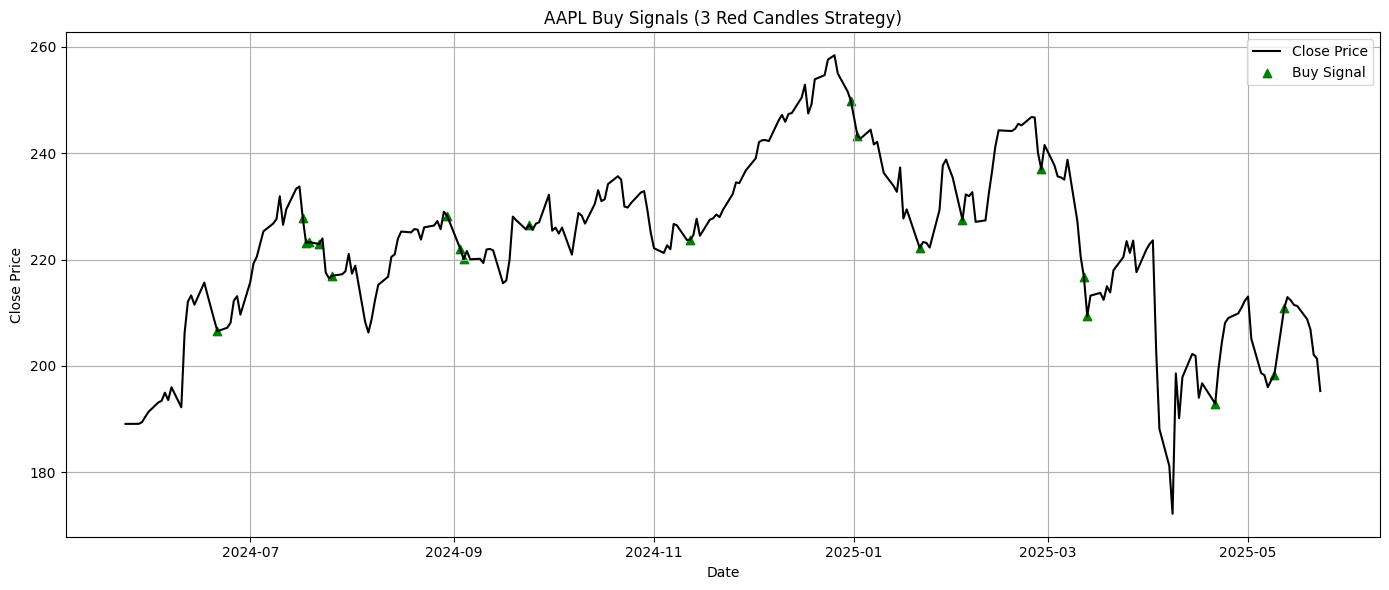

In [33]:
import yfinance as yf
import polars as pl
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

stock = "AAPL"
start_date = (datetime.today() - timedelta(days=365)).strftime("%Y-%m-%d")
end_date = datetime.today().strftime("%Y-%m-%d")
data = yf.download(stock, start=start_date, end=end_date)

data = data.reset_index()
data.columns = [str(col) for col in data.columns]

df = pl.from_pandas(data)

print("Polars DataFrame columns:", df.columns)

df = df.select([
    pl.col("('Date', '')").alias("Date"),
    pl.col("('Open', 'AAPL')").alias("Open"),
    pl.col("('Close', 'AAPL')").alias("Close")
])

def detect_signal(df_dicts):
    signals = []
    for i in range(2, len(df_dicts)):
        d0, d1, d2 = df_dicts[i-2], df_dicts[i-1], df_dicts[i]
        if d0["Close"] < d0["Open"] and d1["Close"] < d1["Open"] and d2["Close"] < d2["Open"]:
            body = d2["Open"] - d2["Close"]
            if body > 0:
                stoploss = round(d2["Close"] - 0.5 * body, 2)
                signals.append({
                    "Date": d2["Date"],
                    "Signal": "Buy",
                    "Stoploss": stoploss,
                    "Price": d2["Close"]
                })
                continue
        signals.append({
            "Date": d2["Date"],
            "Signal": "Hold",
            "Stoploss": None,
            "Price": d2["Close"]
        })
    return pl.DataFrame(signals)

signals = detect_signal(df.to_dicts())

dates = df["Date"].to_list()
prices = df["Close"].to_list()
signal_list = signals["Signal"].to_list()
signal_dates = signals["Date"].to_list()
signal_prices = signals["Price"].to_list()

plt.figure(figsize=(14, 6))
plt.plot(dates, prices, label="Close Price", color="black")

for d, s, p in zip(signal_dates, signal_list, signal_prices):
    if s == "Buy":
        plt.scatter(d, p, color="green", label="Buy Signal", marker="^")

plt.title(f"{stock} Buy Signals (3 Red Candles Strategy)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
# Correct the typo in the method name
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
plt.legend(unique_labels.values(), unique_labels.keys())
plt.tight_layout()
plt.show()

In [35]:
# Make PNL Reports and Summary Reports for previous task.
df_dicts = df.to_dicts()
signals_dicts = signals.to_dicts()

def generate_trades_and_pnl(signals, price_data, hold_days=5):
    trades = []
    price_data_map = {rec["Date"]: rec for rec in price_data}

    for i, signal in enumerate(signals):
        if signal["Signal"] == "Buy":
            buy_date = signal["Date"]
            buy_price = signal["Price"]
            stoploss = signal["Stoploss"]

            # Find index of buy_date in price_data for forward lookup
            try:
                buy_index = next(idx for idx, rec in enumerate(price_data) if rec["Date"] == buy_date)
            except StopIteration:
                continue

            sell_price = None
            sell_date = None
            exit_reason = None

            # Check next `hold_days` for stoploss hit or sell on hold_days
            for offset in range(1, hold_days + 1):
                if buy_index + offset >= len(price_data):
                    break
                future_day = price_data[buy_index + offset]
                close_price = future_day["Close"]
                date = future_day["Date"]

                if close_price <= stoploss:
                    sell_price = close_price
                    sell_date = date
                    exit_reason = "Stoploss hit"
                    break

            if sell_price is None:
                # Exit at close price after hold_days
                sell_index = min(buy_index + hold_days, len(price_data) - 1)
                sell_price = price_data[sell_index]["Close"]
                sell_date = price_data[sell_index]["Date"]
                exit_reason = f"Hold period ({hold_days} days) ended"

            pnl = round((sell_price - buy_price) / buy_price * 100, 2)

            trades.append({
                "Buy_Date": buy_date,
                "Buy_Price": buy_price,
                "Sell_Date": sell_date,
                "Sell_Price": sell_price,
                "Stoploss": stoploss,
                "Exit_Reason": exit_reason,
                "PNL (%)": pnl
            })

    return pl.DataFrame(trades)

def pnl_summary(pnl_df):
    total = pnl_df.height
    wins = pnl_df.filter(pl.col("PNL (%)") > 0).height
    losses = pnl_df.filter(pl.col("PNL (%)") <= 0).height
    avg_pnl = round(pnl_df["PNL (%)"].mean(), 2) if total > 0 else 0
    win_rate = round((wins / total) * 100, 2) if total > 0 else 0

    return {
        "Total Trades": total,
        "Winning Trades": wins,
        "Losing Trades": losses,
        "Average PNL (%)": avg_pnl,
        "Win Rate (%)": win_rate
    }

# Generate PNL report DataFrame
pnl_report = generate_trades_and_pnl(signals_dicts, df_dicts, hold_days=5)

# Generate summary
summary = pnl_summary(pnl_report)

print(pnl_report)
print("\nSummary:")
for k, v in summary.items():
    print(f"{k}: {v}")

shape: (21, 7)
┌─────────────────┬────────────┬────────────────┬────────────┬──────────┬────────────────┬─────────┐
│ Buy_Date        ┆ Buy_Price  ┆ Sell_Date      ┆ Sell_Price ┆ Stoploss ┆ Exit_Reason    ┆ PNL (%) │
│ ---             ┆ ---        ┆ ---            ┆ ---        ┆ ---      ┆ ---            ┆ ---     │
│ datetime[μs]    ┆ f64        ┆ datetime[μs]   ┆ f64        ┆ f64      ┆ str            ┆ f64     │
╞═════════════════╪════════════╪════════════════╪════════════╪══════════╪════════════════╪═════════╡
│ 2024-06-21      ┆ 206.52417  ┆ 2024-06-28     ┆ 209.639572 ┆ 205.08   ┆ Hold period (5 ┆ 1.51    │
│ 00:00:00        ┆            ┆ 00:00:00       ┆            ┆          ┆ days) ended    ┆         │
│ 2024-07-17      ┆ 227.81459  ┆ 2024-07-18     ┆ 223.136444 ┆ 227.53   ┆ Stoploss hit   ┆ -2.05   │
│ 00:00:00        ┆            ┆ 00:00:00       ┆            ┆          ┆                ┆         │
│ 2024-07-18      ┆ 223.136444 ┆ 2024-07-24     ┆ 217.522705 ┆ 220.1    ┆ St